In [386]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import retrieval_functions as rf
import importlib
importlib.reload(rf)
rf.init_plotting()

In [387]:
experiment = "01_Multiplication" # 506
# experiment = "02_Compare" # 507|508|509
experiment = "03_Share"
# experiment = "04_LogReg" # 526|527|528
# experiment = "05_Reveal" # 512
# experiment = "06_LeNet" # 529|530|531
# experiment = "07_Aes" # 525
# experiment = "08_SecureMean" # 519
# experiment = "09_SecureMin" # 516|517|518
# experiment = "10_PSI" # 520
# experiment = "11_Auction" # 521|522|523
# experiment = "12_VGG" # 532|533|534
# experiment = "15_BitAND" # 524
# experiment = "16_Division" # 510

data=[]
# framworks = ["HPMPC", "mp-slice", "MP-SPDZ"]
framworks = ["MPyC", "HPMPC", "mp-slice", "MP-SPDZ"]

base = "./results/Deviation/"
for framework in framworks:
    path= base + framework + "/" + experiment+"/data/short_results.csv"
    frame=pd.read_csv(path ,header=0,sep=';',index_col=False,engine='python')
    frame['framework']=framework
    if framework=="MPyC":
        # assuming your dataframe is df and the time column is 'time'
        frame['runtime_internal(s)'] = pd.to_datetime(frame['runtime_internal(s)'], format='%H:%M:%S.%f').dt.time

        # convert time to seconds
        frame['runtime_internal(s)'] = frame['runtime_internal(s)'].apply(lambda t: t.hour*3600 + t.minute*60 + t.second + t.microsecond*1e-6)
        frame['peakRAM(MiB)']= frame['peakRAM(MiB)']
    elif framework=="HPMPC" or framework=="mp-slice":
        factor = 1
        if frame['splitroles'].max() == 1:
            factor = 6	
        elif frame['splitroles'].max() == 2:
            factor = 24
        else:
            factor=1
        frame['runtime_external(s)'] = pd.to_numeric(frame['runtime_external(s)'])* frame['threads'].max()*factor
    data.append(frame)

In [388]:
import pandas as pd


In [389]:
# fl_paths[-1].split("/")[-2]

In [390]:
# runtime/3600

bandwidths(Mbs)
100      3.34
1000     2.71
10000    2.56
25000    2.70
Name: runtime_external(s), dtype: float64
bandwidths(Mbs)
100      0.090000
1000     0.019992
10000    0.019992
25000    0.019992
Name: runtime_external(s), dtype: float64
bandwidths(Mbs)
100      0.109992
1000     0.030000
10000    0.030000
25000    0.030000
Name: runtime_external(s), dtype: float64
1000000
bandwidths(Mbs)
100      1.48
1000     0.30
10000    0.27
25000    0.29
Name: runtime_external(s), dtype: float64
1000000
bandwidths(Mbs)
100      0.27
1000     0.26
10000    0.26
25000    0.26
Name: runtime_external(s), dtype: float64
1000000
bandwidths(Mbs)
100      1.48
1000     0.30
10000    0.23
25000    0.24
Name: runtime_external(s), dtype: float64
1000000
bandwidths(Mbs)
100      1.48
1000     0.31
10000    0.23
25000    0.23
Name: runtime_external(s), dtype: float64
['MPyC', 'HPMPC 44', 'mp-slice 511', 'MP-SPDZ replicated-field 1000000', 'MP-SPDZ semi2k 1000000', 'MP-SPDZ replicated-ring 1000000', 'MP-

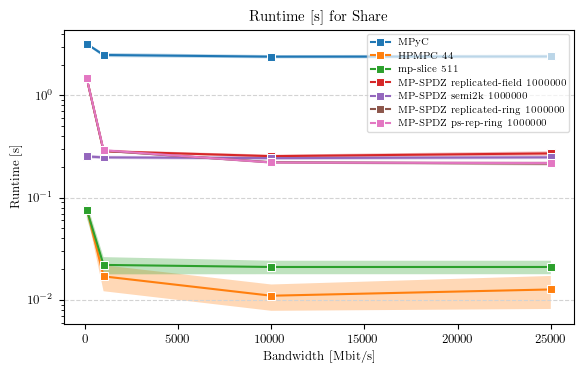

In [391]:
bandwidth,label=rf.get_bandwidth_deviation(data)
# del bandwidth[0] # AUCTION
# del bandwidth[1]
# del bandwidth[-2]
# del bandwidth[-2]
# del label[0]
# del label[1]
# del label[-2]
# del label[-2]
# label = ['HPMPC',
#          'mp-slice RCA',
#          'mp-slice PPA',
#          'mp-slice PPA4',
#          'MP-SPDZ replicated-ring honest maj.',
#          'MP-SPDZ semi2k dishonest maj.']

# del label[-1] # AES
# del bandwidth[-1]
# del label[-2]
# del bandwidth[-2]

# del bandwidth[3] # DIVISION
# del bandwidth[3]
# del label[3]
# del label[3]

# del bandwidth[-2] # secure min
# del bandwidth[-2]
# del label[-2]
# del label[-2]

print(label)
rf.plot_deviation(bandwidth,label,"test.png",experiment,"Bandwidth [Mbit/s]","Runtime [s]",True)

latencies(ms)
0     2.70
25    3.20
50    4.02
75    4.32
Name: runtime_external(s), dtype: float64
latencies(ms)
0     0.019992
25    0.289992
50    0.570000
75    0.840000
Name: runtime_external(s), dtype: float64
latencies(ms)
0    0.03
Name: runtime_external(s), dtype: float64
1000000
latencies(ms)
0     0.29
25    2.77
50    5.27
75    7.61
Name: runtime_external(s), dtype: float64
1000000
latencies(ms)
0     0.26
25    1.77
50    3.26
75    4.77
Name: runtime_external(s), dtype: float64
1000000
latencies(ms)
0     0.24
25    2.77
50    5.27
75    7.77
Name: runtime_external(s), dtype: float64
1000000
latencies(ms)
0     0.23
25    2.79
50    5.32
75    7.91
Name: runtime_external(s), dtype: float64


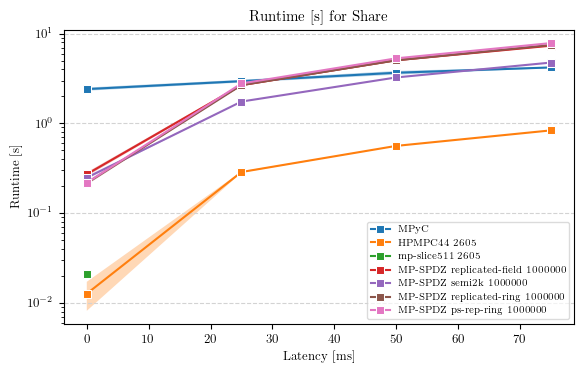

In [392]:
latency,label=rf.get_latency_deviation(data)
# del latency[0] # AUCTION
# del latency[1]
# del latency[2]
# del latency[-2]
# del latency[-2]
# del label[0]
# del label[1]
# del label[2]
# del label[-2]
# del label[-2]

# del label[-1] # AES
# del latency[-1]
# del label[-2]
# del latency[-2]

# del latency[3] # DIVISION
# del latency[3]
# del label[3]
# del label[3]

# del latency[-2] # secure min
# del latency[-2]
# del label[-2]
# del label[-2]

# del latency[-7] # LogReg
# del latency[-7]
# del latency[-7]
# del latency[-7]
# del latency[-7]
# del label[-7]
# del label[-7]
# del label[-7]
# del label[-7]
# del label[-7]
# print(latency)
rf.plot_deviation(latency,label,"test.png",experiment,"Latency [ms]","Runtime [s]",True)

packetdrops(%)
0    2.70
1    3.56
2    2.59
5    4.53
Name: runtime_external(s), dtype: float64
packetdrops(%)
0    0.090000
1    2.059992
2    3.060000
5    8.190000
Name: runtime_external(s), dtype: float64
packetdrops(%)
0    0.109992
Name: runtime_external(s), dtype: float64
packetdrops(%)
0    0.29
1    1.56
2    2.91
5    5.79
Name: runtime_external(s), dtype: float64
packetdrops(%)
0    0.26
1    1.52
2    2.32
5    5.03
Name: runtime_external(s), dtype: float64
packetdrops(%)
0    0.24
1    1.50
2    1.99
5    6.50
Name: runtime_external(s), dtype: float64
packetdrops(%)
0    0.23
Name: runtime_external(s), dtype: float64


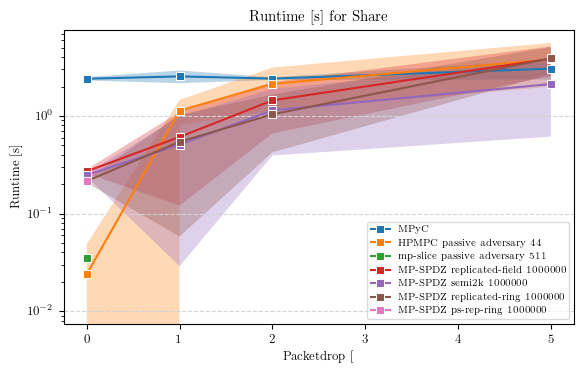

In [393]:
packetdrop,label=rf.get_packetdrop_deviation(data)
# del packetdrop[0] # AUCTION
# del packetdrop[1]
# del packetdrop[2]
# del packetdrop[-2]
# del packetdrop[-2]
# del label[0]
# del label[1]
# del label[2]
# del label[-2]
# del label[-2]

# del label[-1] # AES
# del packetdrop[-1]
# del label[-2]
# del packetdrop[-2]

# del packetdrop[3] # Division
# del packetdrop[3]
# del label[3]
# del label[3]

# del packetdrop[-2] # secure min
# del packetdrop[-2]
# del label[-2]
# del label[-2]
# print(packetdrop)
rf.plot_deviation(packetdrop,label,"test.png",experiment,"Packetdrop [%]","Runtime [s]",True)

In [394]:
bandwidth,label=rf.get_bandwidth_deviation(data)
# del bandwidth[0] # AUCTION
# del bandwidth[1]
# del bandwidth[2]
# del bandwidth[-2]
# del bandwidth[-2]
# del label[0]
# del label[1]
# del label[2]
# del label[-2]
# del label[-2]

# del label[-1] # AES
# del bandwidth[-1]
# del label[-2]
# del bandwidth[-2]

# del bandwidth[3] # Division
# del bandwidth[3]
# del label[3]
# del label[3]

# del bandwidth[-2] # secure min
# del bandwidth[-2]
# del label[-2]
# del label[-2]
[df['mean'].iloc[0] for df in bandwidth]

bandwidths(Mbs)
100      3.34
1000     2.71
10000    2.56
25000    2.70
Name: runtime_external(s), dtype: float64
bandwidths(Mbs)
100      0.090000
1000     0.019992
10000    0.019992
25000    0.019992
Name: runtime_external(s), dtype: float64
bandwidths(Mbs)
100      0.109992
1000     0.030000
10000    0.030000
25000    0.030000
Name: runtime_external(s), dtype: float64
1000000
bandwidths(Mbs)
100      1.48
1000     0.30
10000    0.27
25000    0.29
Name: runtime_external(s), dtype: float64
1000000
bandwidths(Mbs)
100      0.27
1000     0.26
10000    0.26
25000    0.26
Name: runtime_external(s), dtype: float64
1000000
bandwidths(Mbs)
100      1.48
1000     0.30
10000    0.23
25000    0.24
Name: runtime_external(s), dtype: float64
1000000
bandwidths(Mbs)
100      1.48
1000     0.31
10000    0.23
25000    0.23
Name: runtime_external(s), dtype: float64


[3.193,
 0.0779904,
 0.07598640000000001,
 1.4609999999999999,
 0.253,
 1.462,
 1.4689999999999999]

In [395]:
[df['mean'].iloc[0] for df in bandwidth]
[df['std'].iloc[0] for df in bandwidth]

[0.07543208866258436,
 0.006329614964593026,
 0.01265206234572056,
 0.009944289260117584,
 0.01159501808728406,
 0.009189365834726805,
 0.007378647873726233]

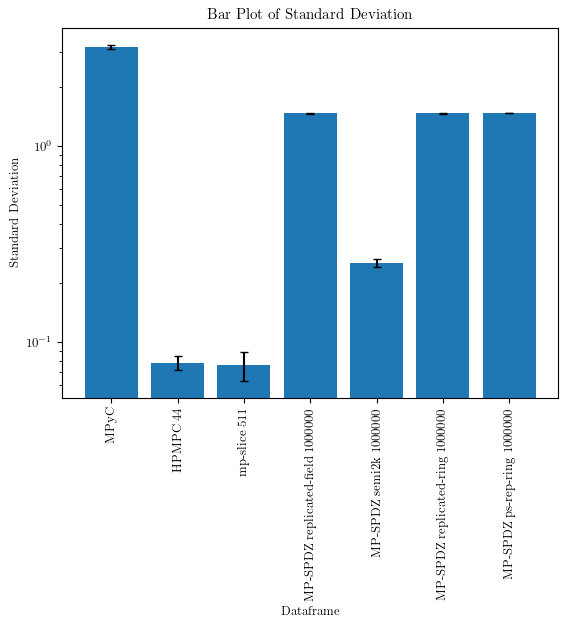

In [396]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the 'mean' and 'std' values separately
mean_values = [df['mean'].iloc[0] for df in bandwidth]
std_values = [df['std'].iloc[0] for df in bandwidth]

# Create a bar plot with 'mean' values as the height of the bars and 'std' values as standard deviation
fig, ax = plt.subplots()
ax.bar(label, mean_values,yerr=std_values,capsize=3)

plt.xticks(rotation='vertical')

# Add labels and title
plt.xlabel('Dataframe')
plt.ylabel('Standard Deviation')
plt.title('Bar Plot of Standard Deviation')

# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Show the plot
plt.show()


In [397]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# # Example data
# fig, ax = plt.subplots()
# deviation61 = data[0].loc[(data[0]['function'] == 507) & (data[0]['packetdrops(%)'] == 0) & (data[0]['latencies(ms)'] == 0) & (data[0]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()
# deviation62 = data[0].loc[(data[0]['function'] == 508)  & (data[0]['packetdrops(%)'] == 0) & (data[0]['latencies(ms)'] == 0) & (data[0]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()
# deviation63 = data[0].loc[(data[0]['function'] == 509) & (data[0]['packetdrops(%)'] == 0) & (data[0]['latencies(ms)'] == 0) & (data[0]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()
# 
# # Plot the first violin plot
# two_dimensional_list = [deviation61, deviation62, deviation63]
# ax.violinplot(two_dimensional_list, showmeans=True, showmedians=True)
# # Set the x-tick labels
# ax.set_xticks([1, 2, 3])
# ax.set_xticklabels(["RCA", "PPA", "PPA (4-way)"])
# 
# 
# # Set plot title and labels
# plt.title("Devation of runtime for HP-MPC Logistic Regression")
# plt.xlabel("Comparison Type")
# plt.ylabel("Runtime [s]")
# ax.figure.set_size_inches(5.91, 2.8)
# fig.tight_layout()
# plt.savefig("HPMPC_deviation.png",dpi=300,bbox_inches='tight')
# plt.show()